In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Import Libraries

In [75]:
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings("ignore")

In [76]:
df = pd.read_csv('/content/gdrive/MyDrive/draft ipynb/data/Reviews_nltk.csv')

In [77]:
df.head()

,Unnamed: 0,type,ori_text,text
0,0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...,bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better
1,1,0,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",product arriv label jumbo salt peanut peanut actual small size unsalt not sure error vendor intend repres product jumbo
2,2,1,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...",confect around centuri light pillowi citrus gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven not chewi flavor high recommend yummi treat familiar stori lewi lion w...
3,3,0,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...,look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin
4,4,1,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",great taffi great price wide assort yummi taffi deliveri quick taffi lover deal


In [80]:
df['type'].value_counts()

1    443769
0    124677
Name: type, dtype: int64

In [81]:
pd.set_option('display.max_colwidth', 200)

###Visualizing most frequent words using WordCloud

In [86]:
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [87]:
positive_reviews = df[df["type"] == 1]["text"]
negative_reviews = df[df["type"] == 0]["text"]

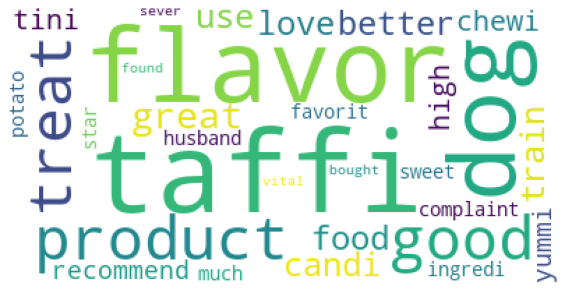

In [96]:
wordcloud = WordCloud(max_font_size=80,max_words=30, background_color="white").generate(str(positive_reviews))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

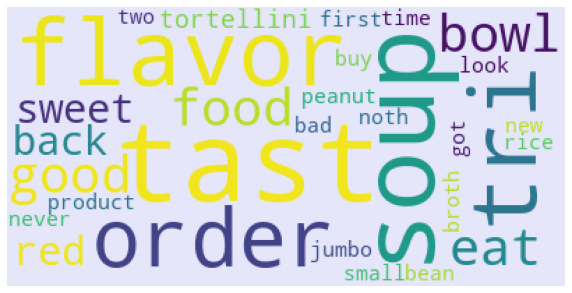

In [107]:
wordcloud = WordCloud(max_font_size=80,max_words=30, background_color="lavender").generate(str(negative_reviews))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [109]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [110]:
df['text'] = [' '.join(df['text'][i].split()) for i in range(len(df))]

In [111]:
df['text']=df['text'].str.replace("br","")

In [112]:
from collections import defaultdict
import seaborn as sns

In [287]:
unigrams = defaultdict(int)
for x in df['text']:
    for word in generate_ngrams(x, 1):
        unigrams[word] += 1
        
df_unigrams = pd.DataFrame(sorted(unigrams.items(), key=lambda x: x[1])[::-1])

unigrams_top_ten = df_unigrams[:10]

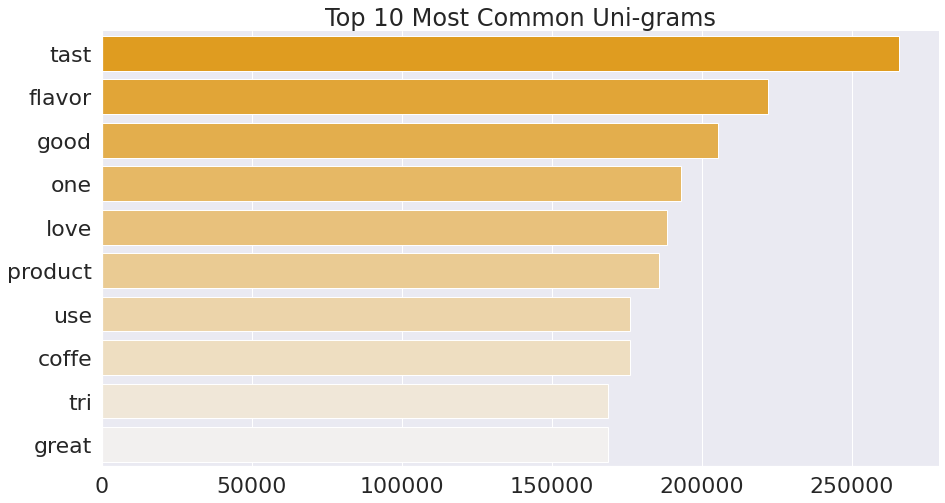

In [286]:
plt.figure(figsize = (15,8))

color = sns.light_palette('orange',n_colors=10, reverse=True)
ax = sns.barplot(x=unigrams_top_ten[1],y=unigrams_top_ten[0], palette = color)
sns.despine()
ax.set_title('Top 10 Most Common Uni-grams')
ax.set(xlabel=None, ylabel=None)
sns.set(font_scale = 2)

plt.show()

In [192]:
bigrams = defaultdict(int)
for x in df['text']:
    for word in generate_ngrams(x, 2):
        bigrams[word] += 1
        
df_bigrams = pd.DataFrame(sorted(bigrams.items(), key=lambda x: x[1])[::-1])

bigrams_top_ten = df_bigrams[:10]

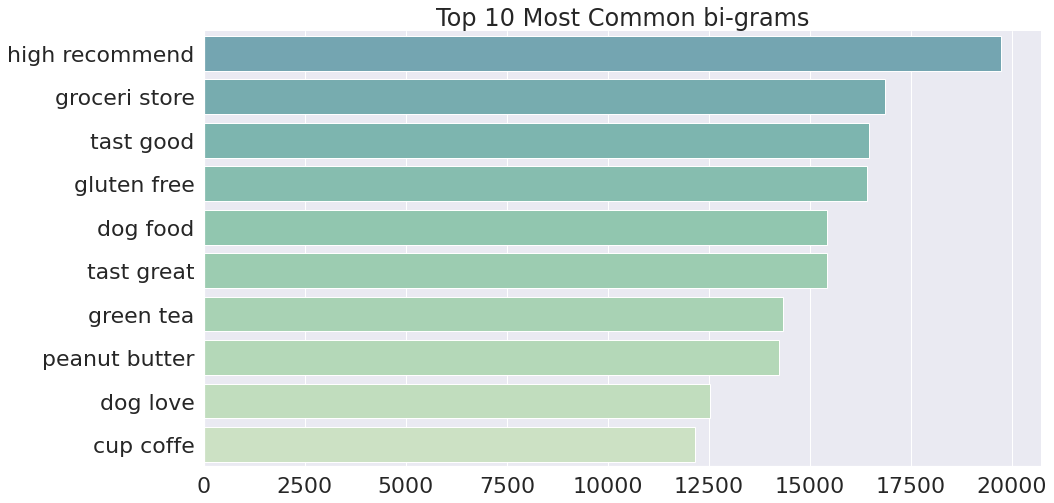

In [285]:
plt.figure(figsize = (15,8))

color = sns.cubehelix_palette(10, start=1.3, rot=-0.98, hue = 1, dark = 0.6, reverse = True)
ax = sns.barplot(x=bigrams_top_ten[1],y=bigrams_top_ten[0], palette = color)
sns.despine()
ax.set_title('Top 10 Most Common bi-grams')
ax.set(xlabel=None, ylabel=None)
sns.set(font_scale = 2)

plt.show()